In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
weather = pd.read_csv("data/historical_weather.csv", ",", parse_dates= ["time"])
weather["precipitation_sum (mm)"] = weather["precipitation_sum (mm)"].replace(np.nan, 0)
weather

C:\Users\MICHELE\AppData\Local\Temp\ipykernel_3220\1083928198.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  weather = pd.read_csv("data/historical_weather.csv", ",", parse_dates= ["time"])


,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm)
0,1940-01-01,2.1,-5.5,-2.1,0.0
1,1940-01-02,1.1,-4.8,-2.3,0.0
2,1940-01-03,-1.4,-6.5,-4.5,0.0
3,1940-01-04,3.1,-2.4,0.3,1.6
4,1940-01-05,5.6,-0.8,2.4,0.1
...,...,...,...,...,...
30526,2023-07-30,28.2,18.7,23.3,0.0
30527,2023-07-31,26.7,18.4,22.4,6.1
30528,2023-08-01,25.8,18.5,22.6,0.7
30529,2023-08-02,NaN,NaN,NaN,0.0


<AxesSubplot:>

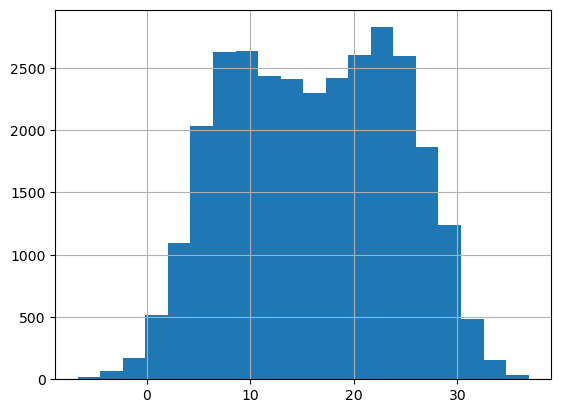

In [90]:
weather["temperature_2m_max (°C)"].hist(bins=20)

## Temperature medie delle temperature massime per mese

In [91]:
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
means = []
for month in months : 
    mean = weather[(weather["time"].dt.strftime('%m'))==month]["temperature_2m_max (°C)"].mean()
    means.append(mean)
max_per_month = pd.DataFrame({"months" : months, "max_per_month" : means})
max_per_month

,months,max_per_month
0,01,5.559140
1,02,7.747535
2,03,12.118817
3,04,15.947103
4,05,20.088095
5,06,24.038810
6,07,26.566782
7,08,26.011305
8,09,22.050522
9,10,16.528760


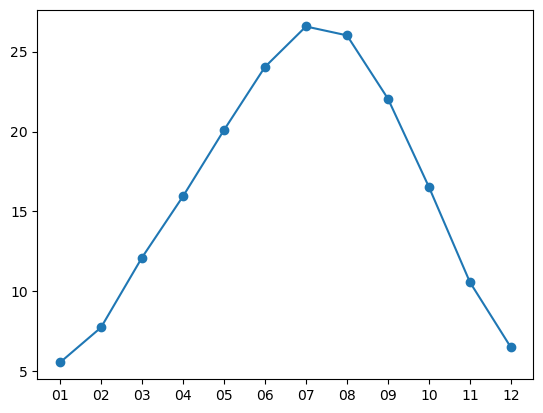

<Figure size 3000x3000 with 0 Axes>

In [92]:
plt.plot(max_per_month.months, max_per_month["max_per_month"], marker='o')
plt.figure(figsize=(30,30))
plt.show()

## Temperature medie delle temperature massime per anno

In [93]:
years = np.arange(int(weather["time"].dt.strftime('%Y').min()), int(weather["time"].dt.strftime('%Y').max())+1)
means = []
for year in years : 
    mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["temperature_2m_max (°C)"].mean()
    means.append(mean)
mean_max_per_year = pd.DataFrame({"years" : years, "mean_per_year" : means})
mean_max_per_year

,years,mean_per_year
0,1940,15.285792
1,1941,15.349589
2,1942,16.400000
3,1943,17.396986
4,1944,16.358743
...,...,...
79,2019,17.761370
80,2020,17.436339
81,2021,16.938356
82,2022,18.704384


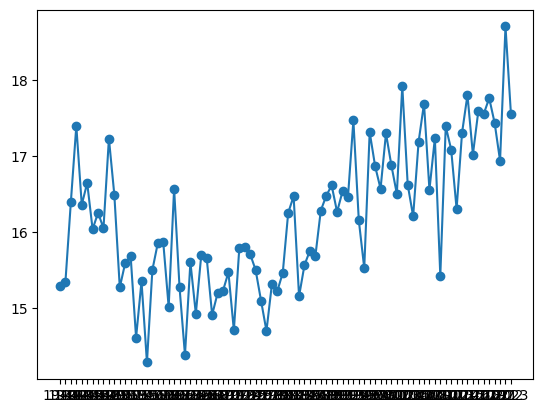

<Figure size 3000x3000 with 0 Axes>

In [94]:
plt.plot(mean_max_per_year.years.astype(str), mean_max_per_year["mean_per_year"], marker='o')
plt.figure(figsize=(30,30))
plt.show()

## Relazione tra l'anno e la temperatura media massima?

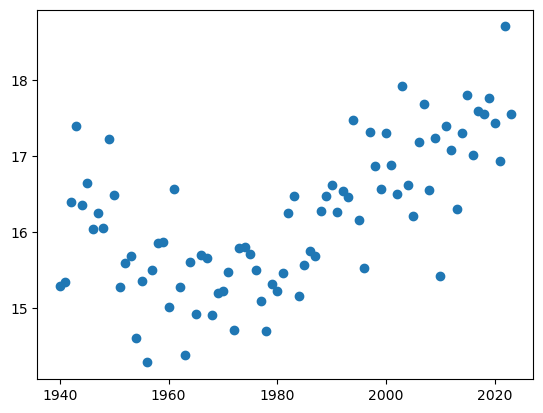

0.6067665110659664


In [95]:
plt.scatter(mean_max_per_year.years, mean_max_per_year.mean_per_year)
plt.show()
print(mean_max_per_year.years.corr(mean_max_per_year.mean_per_year))

## Temperature massime per anno 

In [96]:
years = np.arange(int(weather["time"].dt.strftime('%Y').min()), int(weather["time"].dt.strftime('%Y').max())+1)
maxs = []
for year in years : 
    max = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["temperature_2m_max (°C)"].max()
    maxs.append(max)
max_per_year = pd.DataFrame({"years" : years, "max_per_year" : maxs})
max_per_year

,years,max_per_year
0,1940,32.3
1,1941,31.3
2,1942,32.2
3,1943,35.1
4,1944,34.4
...,...,...
79,2019,36.1
80,2020,34.1
81,2021,32.1
82,2022,35.6


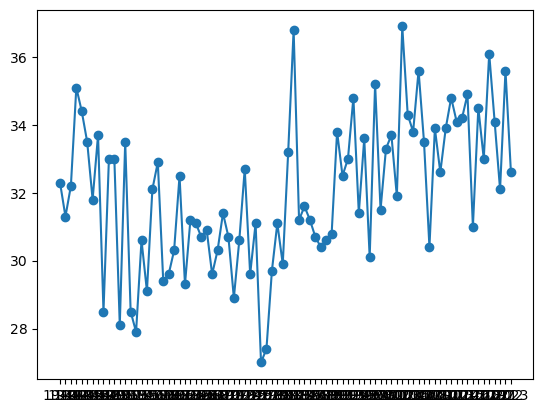

<Figure size 3000x3000 with 0 Axes>

In [97]:
plt.plot(max_per_year.years.astype(str), max_per_year["max_per_year"], marker='o')
plt.figure(figsize=(30,30))
plt.show()

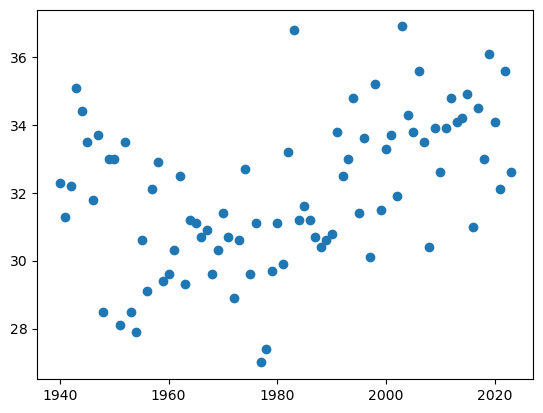

0.42592050760032324

In [98]:
plt.scatter(max_per_year.years, max_per_year.max_per_year)
plt.show()
max_per_year.years.corr(max_per_year.max_per_year)

## Precipitazioni

### Media per mese

In [101]:
means = []
for month in months : 
    mean = weather[(weather["time"].dt.strftime('%m'))==month]["precipitation_sum (mm)"].mean()
    means.append(mean)
max_per_month = pd.DataFrame({"months" : months, "mean_per_month (mm)" : means})
max_per_month

,months,mean_per_month
0,01,1.956260
1,02,2.067425
2,03,2.370200
3,04,3.282817
4,05,3.500806
5,06,3.189087
6,07,2.662404
7,08,3.035248
8,09,3.123253
9,10,3.409405


### Media per anno

In [111]:
means = []
for year in years : 
    mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["precipitation_sum (mm)"].mean()
    means.append(mean)
mean_per_year = pd.DataFrame({"years" : years, "mean_per_year (mm)" : means})
mean_per_year

2.864825914644138


,years,mean_per_year (mm)
0,1940,1.850273
1,1941,2.801918
2,1942,2.123836
3,1943,2.126027
4,1944,2.210109
...,...,...
79,2019,3.198356
80,2020,2.953552
81,2021,2.751233
82,2022,2.040548


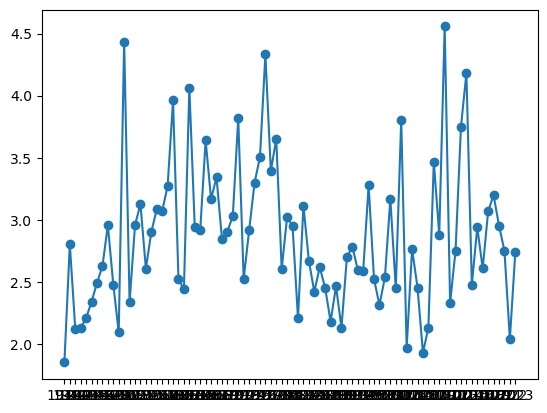

<Figure size 3000x3000 with 0 Axes>

In [110]:
plt.plot(mean_per_year.years.astype(str), mean_per_year["mean_per_year (mm)"], marker='o')
plt.figure(figsize=(30,30))
plt.show()

### Media per 4 anni alla volta

In [118]:
means = []
years_by4 = np.arange(int(weather["time"].dt.strftime('%Y').min()), int(weather["time"].dt.strftime('%Y').max())+1, 4)
for year in years_by4 : 
    mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["precipitation_sum (mm)"].mean()
    means.append(mean)
mean_per_year = pd.DataFrame({"years" : years_by4, "mean_per_year (mm)" : means})
mean_per_year

,years,mean_per_year (mm)
0,1940,1.850273
1,1944,2.210109
2,1948,2.955738
3,1952,2.334153
4,1956,2.901913
5,1960,3.961202
6,1964,2.939344
7,1968,3.342896
8,1972,3.816667
9,1976,3.506011


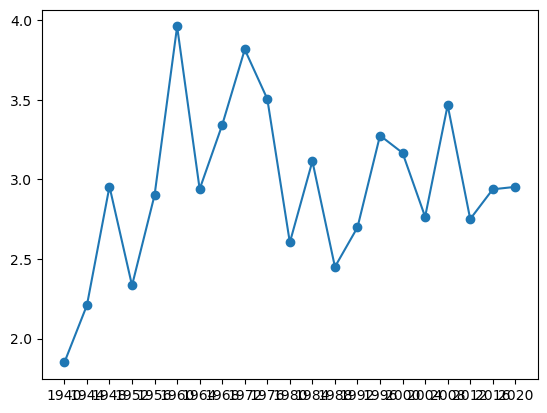

<Figure size 3000x3000 with 0 Axes>

In [119]:
plt.plot(mean_per_year.years.astype(str), mean_per_year["mean_per_year (mm)"], marker='o')
plt.figure(figsize=(30,30))
plt.show()

#### Prove

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm)
31,1940-02-01,-0.7,-7.6,-3.7,7.9
32,1940-02-02,2.2,-6.4,-2.3,0.0
33,1940-02-03,0.8,-5.5,-2.2,0.0
34,1940-02-04,3.3,-4.2,-0.2,0.0
35,1940-02-05,5.2,-3.8,0.4,0.0
...,...,...,...,...,...
30370,2023-02-24,12.5,7.6,9.7,1.7
30371,2023-02-25,14.7,3.8,9.1,0.2
30372,2023-02-26,4.1,0.7,2.6,12.8
30373,2023-02-27,4.2,-1.2,1.7,1.8


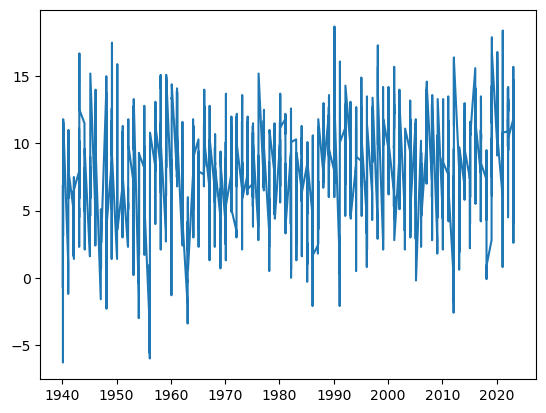

In [ ]:
w = weather[(weather["time"].dt.strftime('%m'))==months[1]]

plt.plot(w.time, w["temperature_2m_max (°C)"])
w